In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

### filter

In [7]:
adata = sc.read_h5ad('/stanley/WangLab/Data/Processed/2022-09-12-Rena-HeLa16Gene/output/adata/2022-09-29-Rena-HeLa16Gene-preflt.h5ad')
adata.obs

,orig_index,sample,area,x,y,z,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts
0,0,1,696855,89,4950,24,15,2.772589,403.0,6.001415
1,1,1,538053,83,7029,23,15,2.772589,262.0,5.572154
2,2,1,715678,117,2820,22,14,2.708050,278.0,5.631212
3,3,1,1313749,186,3765,23,15,2.772589,581.0,6.366470
4,4,1,561750,170,1387,26,15,2.772589,253.0,5.537334
...,...,...,...,...,...,...,...,...,...,...
3671,507,7,562496,13034,2515,17,16,2.833213,411.0,6.021023
3672,508,7,613527,13057,6526,16,16,2.833213,722.0,6.583409
3673,509,7,588370,13041,7724,16,15,2.772589,586.0,6.375025
3674,510,7,597927,13050,5507,16,14,2.708050,393.0,5.976351


In [8]:
sample_list = list(range(1,8))

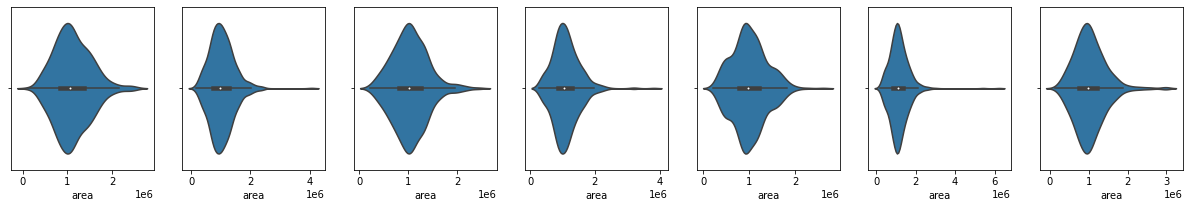

In [12]:
# cell volume
fig, ax = plt.subplots(1, len(sample_list), figsize=(3*len(sample_list), 3))
for i, sample in enumerate(sample_list):
    obs = adata.obs[adata.obs['sample']==sample]
    sns.violinplot(data=obs, x='area', ax=ax[i])

In [ ]:
# total counts

In [ ]:
# n_genes per cell

In [5]:
# filtering -- TODO tune
sc.pp.filter_cells(adata, min_genes=1)
adata.obs

,orig_index,sample,area,x,y,z,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,n_genes
0,0,1,696855,89,4950,24,15,2.772589,403.0,6.001415,15
1,1,1,538053,83,7029,23,15,2.772589,262.0,5.572154,15
2,2,1,715678,117,2820,22,14,2.708050,278.0,5.631212,14
3,3,1,1313749,186,3765,23,15,2.772589,581.0,6.366470,15
4,4,1,561750,170,1387,26,15,2.772589,253.0,5.537334,15
...,...,...,...,...,...,...,...,...,...,...,...
3671,507,7,562496,13034,2515,17,16,2.833213,411.0,6.021023,16
3672,508,7,613527,13057,6526,16,16,2.833213,722.0,6.583409,16
3673,509,7,588370,13041,7724,16,15,2.772589,586.0,6.375025,15
3674,510,7,597927,13050,5507,16,14,2.708050,393.0,5.976351,14


### detection efficiency

In [11]:
avg_20h = np.mean(adata.X[adata.obs['sample']==1], axis=0)
avg_star = np.mean(adata.X[adata.obs['sample']==7], axis=0)
detec_effi = avg_20h / avg_star

In [7]:
pd.DataFrame(zip(adata.var.index, avg_20h / avg_star), columns=['gene', 'detection efficiency'])

,gene,detection efficiency
0,EEF2,0.155682
1,TFRC,0.737737
2,NEAT1,0.600217
3,TOP2A,0.865969
4,DAG1,0.931159
5,MKI67,0.230182
6,TMEM43,0.682297
7,TTYH3,0.281598
8,BIRC5,0.771183
9,PCNA,0.555055


<AxesSubplot:ylabel='Count'>

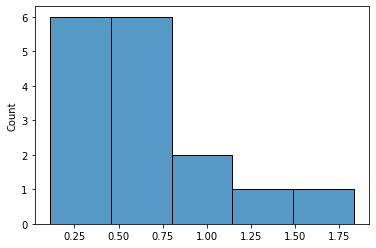

In [12]:
sns.histplot(detec_effi)

c:\Users\wangk\.conda\envs\connie\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 360.0)

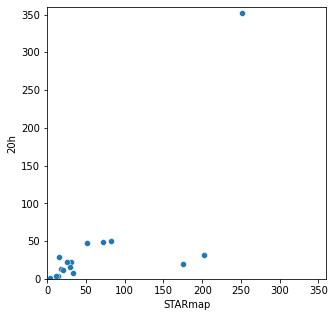

In [29]:
# plt.figure(figsize=(5,5))
# fig = sns.scatterplot(avg_star, avg_20h)
# fig.set_xlabel('STARmap')
# fig.set_ylabel('20h')
# fig.set_xlim(0, 360)
# fig.set_ylim(0, 360)

### labeling efficiency

In [8]:
avg_1h = np.mean(adata.X[adata.obs['sample']==6], axis=0)

In [10]:
pd.DataFrame(zip(adata.var.index, avg_1h / avg_20h), columns=['gene', 'labeling efficiency'])

,gene,labeling efficiency
0,EEF2,0.114663
1,TFRC,0.176848
2,NEAT1,0.439665
3,TOP2A,0.788482
4,DAG1,0.219332
5,MKI67,0.193378
6,TMEM43,0.242239
7,TTYH3,0.343482
8,BIRC5,0.144658
9,PCNA,0.156852


c:\Users\wangk\.conda\envs\connie\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 360.0)

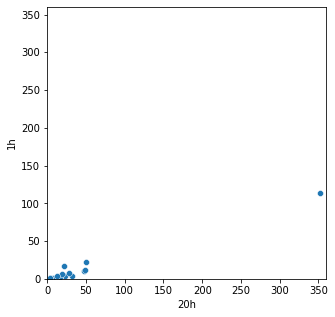

In [28]:
# plt.figure(figsize=(5,5))
# fig = sns.scatterplot(avg_20h, avg_1h)
# fig.set_xlabel('20h')
# fig.set_ylabel('1h')
# fig.set_xlim(0, 360)
# fig.set_ylim(0, 360)